# ***Let's Begin !***

### Import Libraries

In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



### Dataset Loading

In [6]:
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [8]:
df.shape

(7787, 12)

### Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

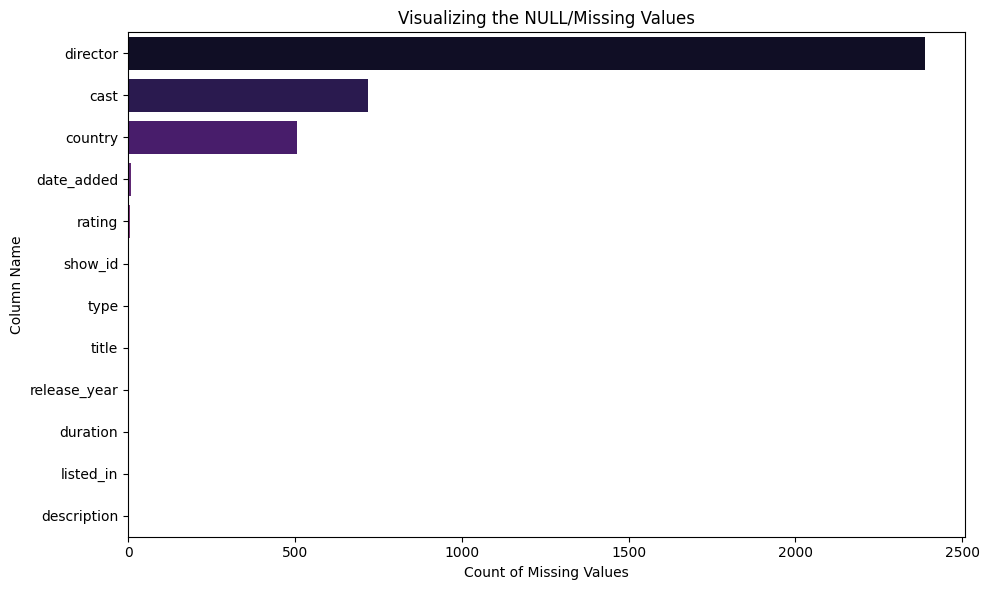

In [12]:
null_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, max(5, len(null_counts) * 0.5)))
sns.barplot(
    x=null_counts.values,
    y=null_counts.index,
    hue=null_counts.index,
    palette='magma',
    dodge=False,
    legend=False
)
plt.title("Visualizing the NULL/Missing Values")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Answer Here:
> i came to know that 5 columns has missing or null values specially country, cast and director.

## ***2. Understanding Your Variables***

In [13]:
print(f"The columns we have in the dataset :\n {df.columns.to_list()}")

The columns we have in the dataset :
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Answer Here
> There's only 1 numeric column so as of now we do not have any valueble info about the data.

### Check Unique Values for each variable.

In [15]:
print("Number of uniques values by each column :")
print("-"*41)
for cols in df.columns:
    print(f"{cols} : unique values --> {df[cols].nunique()}")

Number of uniques values by each column :
-----------------------------------------
show_id : unique values --> 7787
type : unique values --> 2
title : unique values --> 7787
director : unique values --> 4049
cast : unique values --> 6831
country : unique values --> 681
date_added : unique values --> 1565
release_year : unique values --> 73
rating : unique values --> 14
duration : unique values --> 216
listed_in : unique values --> 492
description : unique values --> 7769


C:\Users\junai\AppData\Local\Temp\ipykernel_9712\1219664217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


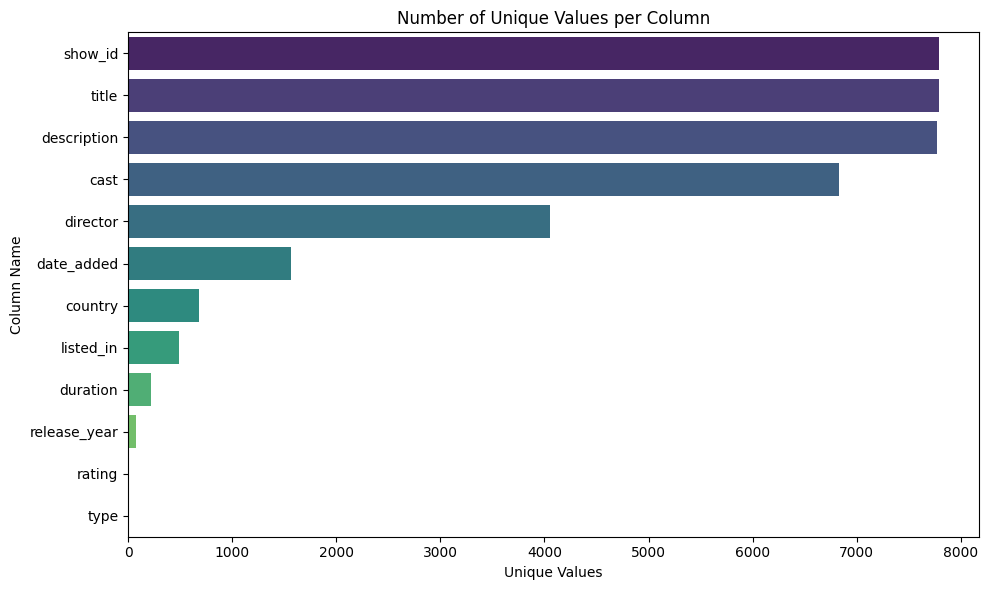

In [16]:
unique_counts = df.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, max(5, len(unique_counts) * 0.5)))
sns.barplot(
    x=unique_counts.values,
    y=unique_counts.index,
    palette='viridis'
)
plt.title("Number of Unique Values per Column")
plt.xlabel("Unique Values")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
df[["director", "cast"]] = df[["director", "cast"]].fillna("UNK")

In [18]:
df["country"] = df["country"].fillna(df.country.mode()[0])

In [19]:
df.dropna(axis=0, inplace=True)

In [20]:
print("Checking the null values again.")
print("-"*30)
print(df.isnull().sum())

Checking the null values again.
------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [21]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  day_added     7770 non-null   int32         
 13  month_added   7770 non-null   int32         
 14  year_added    7770 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(1), o

In [23]:
rating_map = {
    'TV-MA': 'Adult Content',
    'R': 'Adult Content',
    'PG-13': 'Teen Content',
    'TV-14': 'Teen Content',
    'TV-PG': 'Children Content',
    'NR': 'Not Rated',
    'TV-G': 'Children Content',
    'TV-Y': 'Family-friendly Content',
    'TV-Y7': 'Family-friendly Content',
    'PG': 'Children Content',
    'G': 'Children Content',
    'NC-17': 'Adult Content',
    'TV-Y7-FV': 'Family-friendly Content',
    'UR': 'Not Rated'
}

df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()


C:\Users\junai\AppData\Local\Temp\ipykernel_9712\1442288348.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace(rating_map, inplace=True)


array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [24]:
df.drop(columns=["show_id", "date_added", "listed_in"], axis=1, inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.
> So i mainly made 4 chamges fillna, typecasting, mapping and dropping.

> 1st in the diractor and cast column i replaced the null values UNk, in the country column i replaced the missing values with mode means with the most appeared country in that column, The remaining columns had very few null values so i dropped them.

> 2nd in the type casting i change the data type of columns like date_added from object to datetime and  some others too.

> 3rd I mapped the ratings column which had weird values like  G, R, PG i took the help of chat gpt to convert those values to like adult content & teen content to make it more readable.

> That's all i did here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

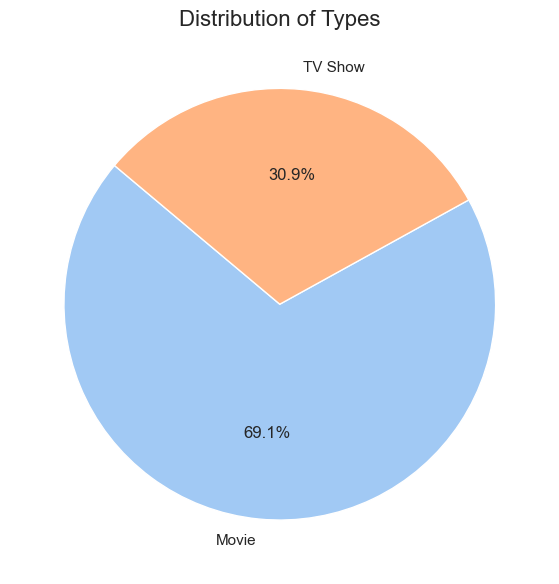

In [25]:
type_counts = df['type'].value_counts()
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")[0:len(type_counts)]

plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of Types', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer Here.
> A pie chart is appropriate for this plot because we're visualizing the proportional distribution of a categorical variable — specifically, the number of TV Shows versus Movies.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> There's huge difference between the movies and tv showes released by the netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
> maybe netflix should focus on makaing more Tv show to increase the watch time.

#### Chart - 2

C:\Users\junai\AppData\Local\Temp\ipykernel_9712\3704946015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\junai\AppData\Local\Temp\ipykernel_9712\3704946015.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


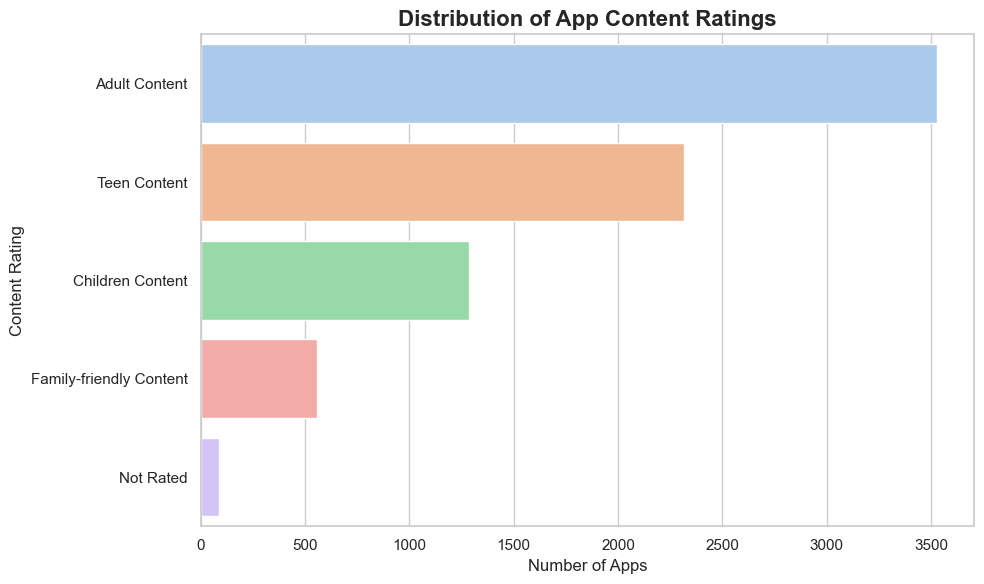

In [26]:
rating_counts = df.rating.value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts = rating_counts.sort_values(by="Count", ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("pastel")

sns.barplot(
    data=rating_counts,
    x="Count",
    y="Rating",
    palette=palette
)
plt.title("Distribution of App Content Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Number of Apps")
plt.ylabel("Content Rating")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
> I usually prefer the barplot whenever i have multiiple columns with values and seaborn makes it easy and attractive.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> By looking at the chart i could clearly say that the majprity of the content is adult in comperison to the children and teen content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
> Maybe netflix should focus on making the more teen content as well keep making the good family showas and adult content that's what today's generation like the most. 

#### Chart - 3

In [27]:
df_movies = df.query("type == 'Movie'")
df_tvshows = df.query("type == 'TV Show'")

C:\Users\junai\AppData\Local\Temp\ipykernel_9712\4139151584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(y = "cast", x = "title", data = df_actor, palette='Set1')
C:\Users\junai\AppData\Local\Temp\ipykernel_9712\4139151584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(y = "cast", x = "title", data = df_actor, palette='Set1')


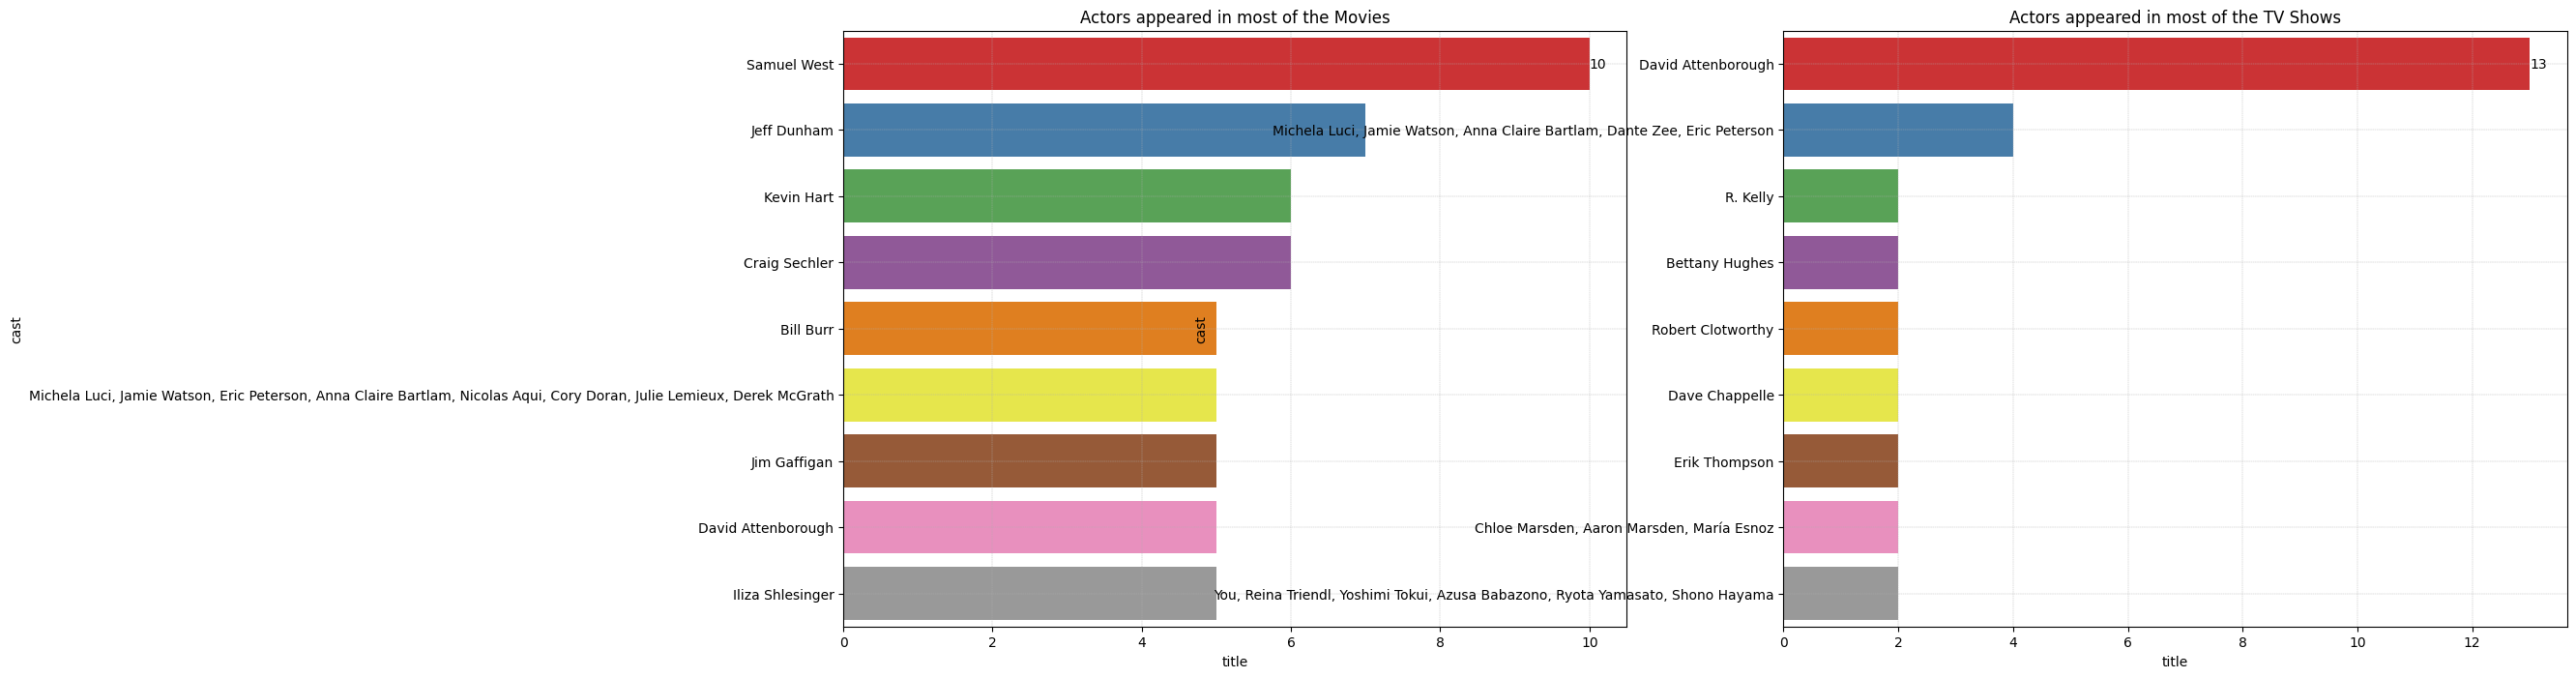

In [28]:
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in [(df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)]:
    plt.subplot(1,2,k+1)
    df_actor = i.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
    plots = sns.barplot(y = "cast", x = "title", data = df_actor, palette='Set1')
    plt.title(f'Actors appeared in most of the {j}')
    plt.grid(linestyle='--', linewidth=0.3)
    plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
> by this plot we can easily see which actors has the most movies/tv shows on the netflix.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> i do not think i get some helpfull insights from this graph, these are all some foregin actors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4

In [29]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'description', 'day_added', 'month_added',
       'year_added'],
      dtype='object')

C:\Users\junai\AppData\Local\Temp\ipykernel_9712\395546683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(y = "director", x = "title", data = df_actor, palette='Set1')
C:\Users\junai\AppData\Local\Temp\ipykernel_9712\395546683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(y = "director", x = "title", data = df_actor, palette='Set1')


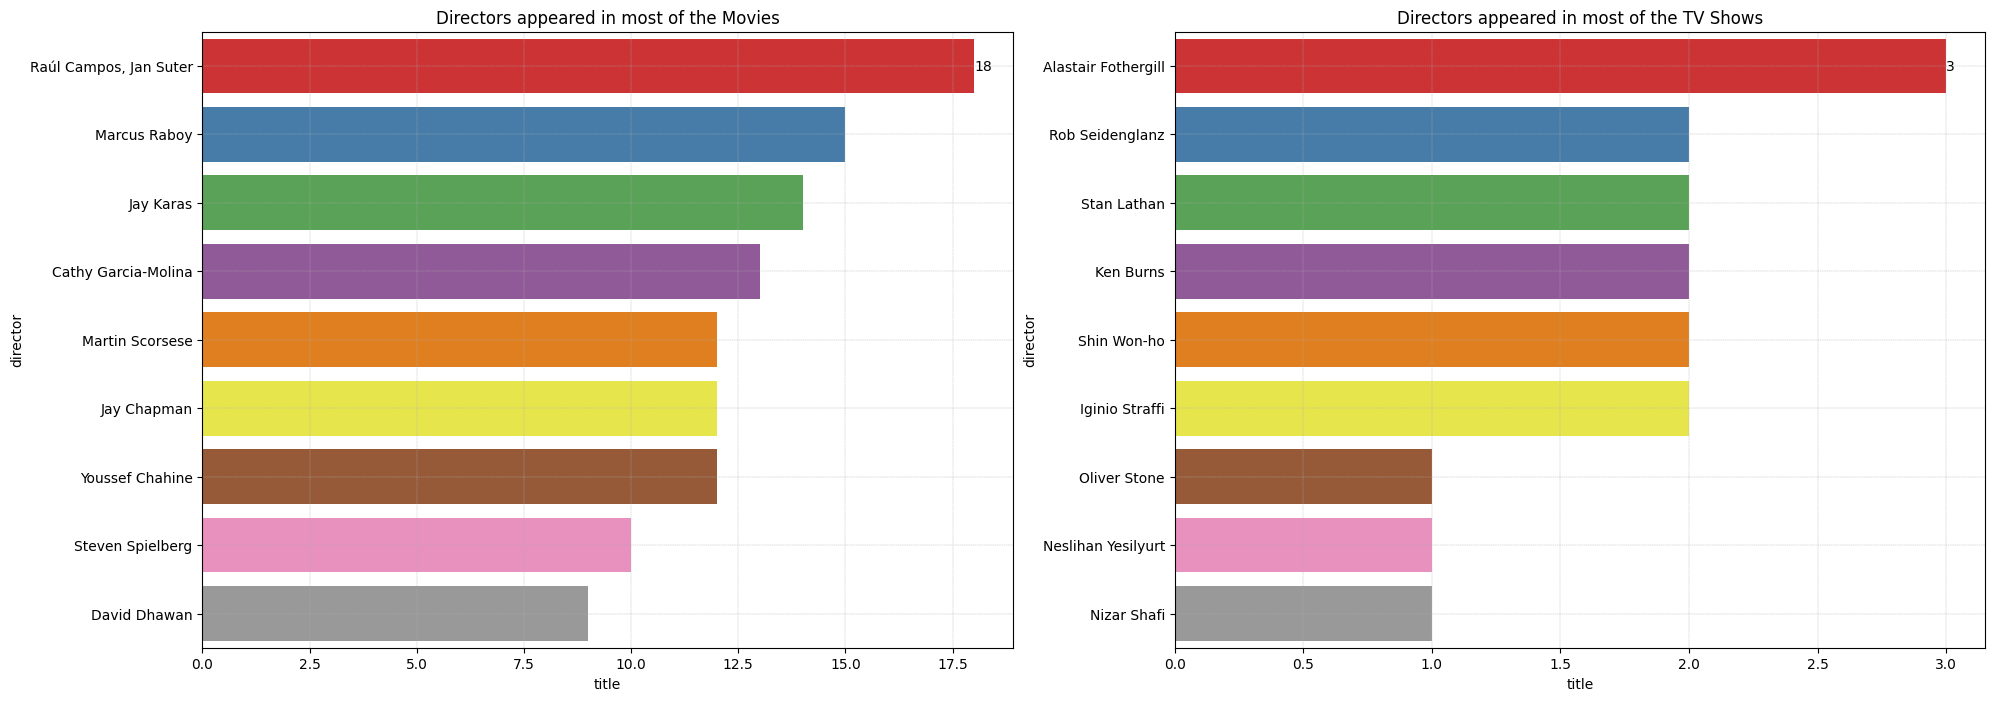

In [30]:
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in [(df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)]:
    plt.subplot(1,2,k+1)
    df_actor = i.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
    plots = sns.barplot(y = "director", x = "title", data = df_actor, palette='Set1')
    plt.title(f'Directors appeared in most of the {j}')
    plt.grid(linestyle='--', linewidth=0.3)
    plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> When it comes to movies Raul campos and jan suter is pretty famous and when it comes to tv shows Alastair Fothegill is famous

#### Chart - 5

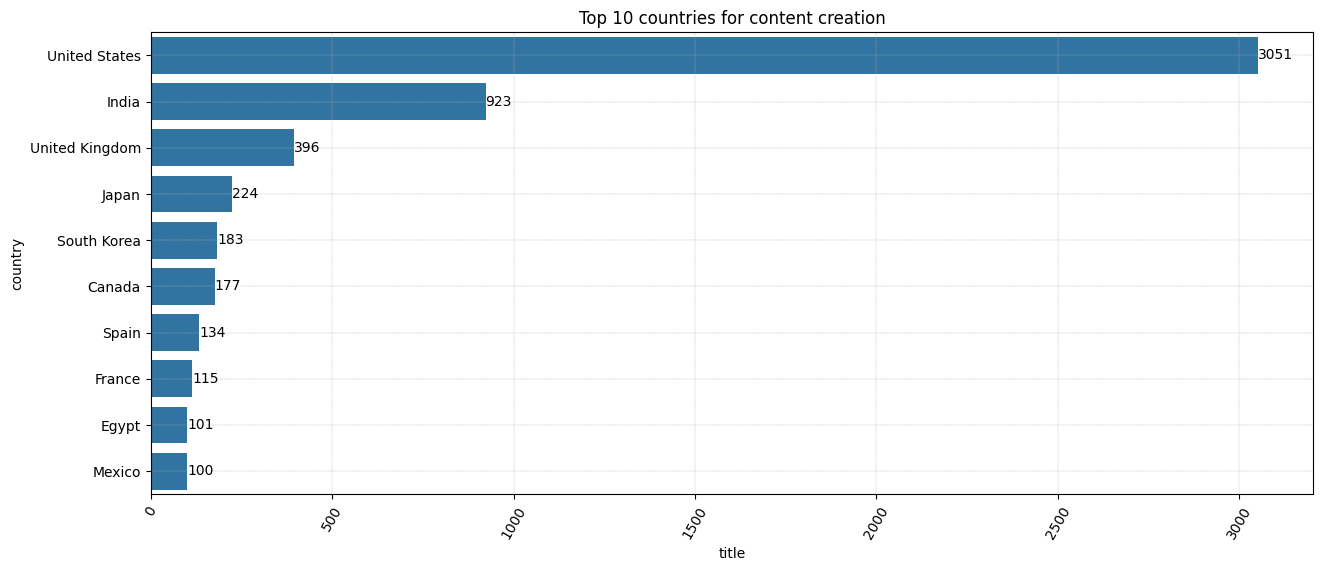

In [31]:
df_country = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
plt.figure(figsize=(15,6))
plots = sns.barplot(y = "country", x = "title", data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
> to know which countries has the most conent on the netflix

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> USK, IND & UK are the top 3 countries with most conteant on the netflix

#### Chart - 6

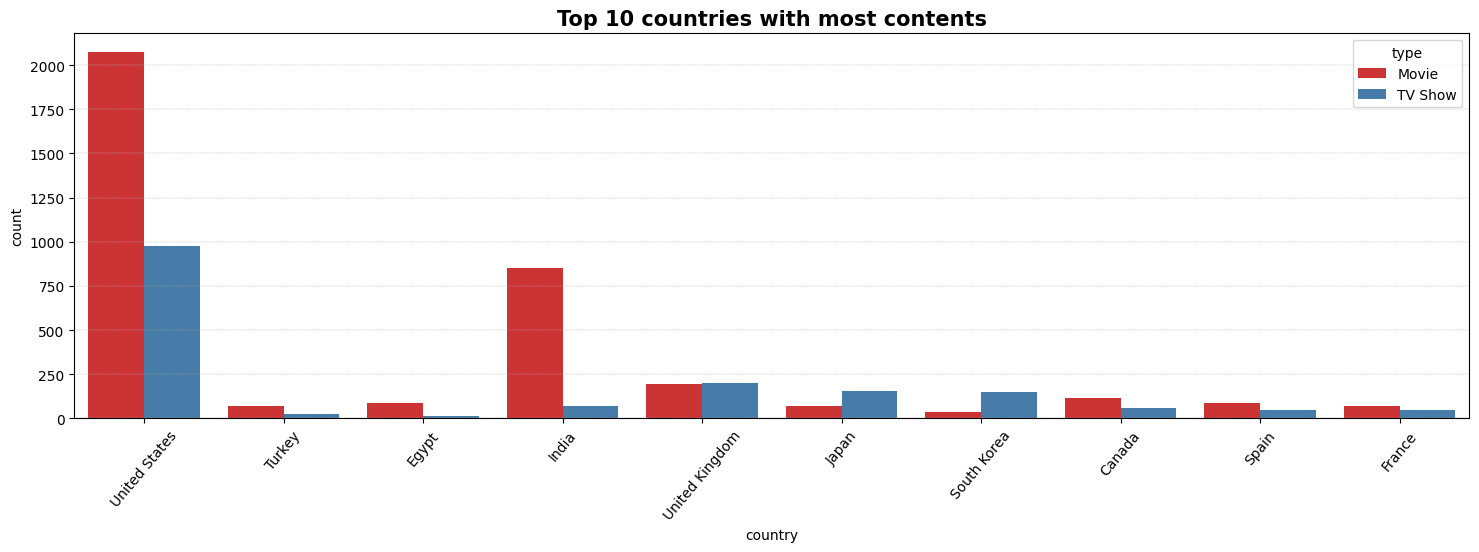

In [32]:
top_countries = df['country'].value_counts().index[:10]
filtered_df = df[df['country'].isin(top_countries)]

plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(data=filtered_df, x='country', hue='type', palette="Set1")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
> To know the contribution of the movies and tv shows by the countries.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> Majority of the countries has more movies than tv show only UK has the same  number of movies and tv shows

#### Chart - 7

C:\Users\junai\AppData\Local\Temp\ipykernel_9712\3260602253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x='day_added', y='title', data=df_day, palette='husl')
C:\Users\junai\AppData\Local\Temp\ipykernel_9712\3260602253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x='day_added', y='title', data=df_day, palette='husl')


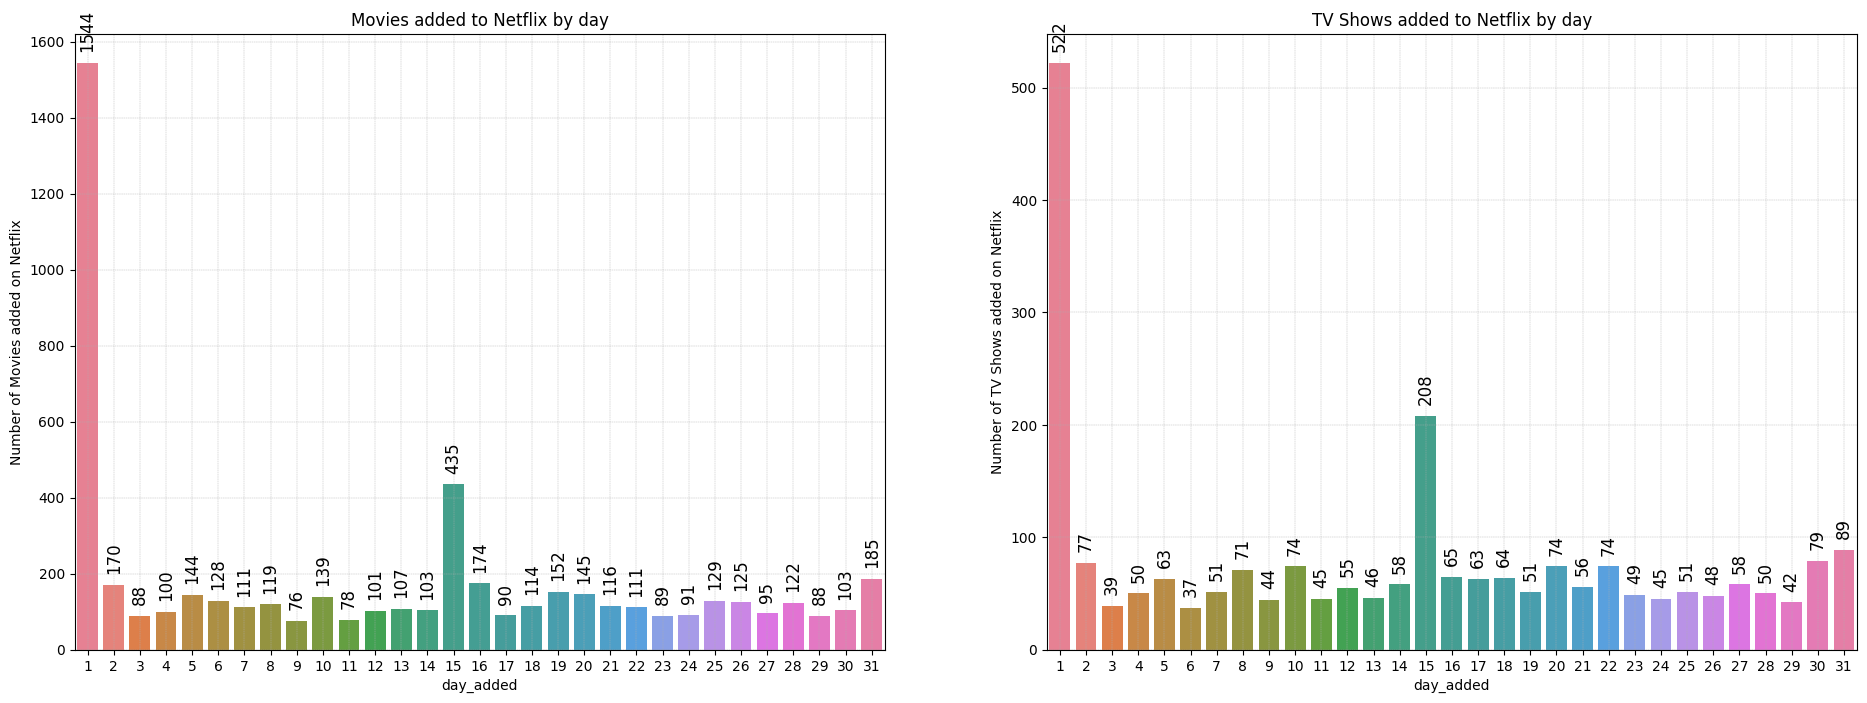

In [33]:
plt.figure(figsize=(23,8))
for i, j, k in [(df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)]:
    plt.subplot(1, 2, k+1)
    df_day = i.groupby(['day_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['day_added'], ascending=False)
    plots = sns.barplot(x='day_added', y='title', data=df_day, palette='husl')
    plt.title(f'{j} added to Netflix by day')
    plt.ylabel(f'Number of {j} added on Netflix')
    plt.grid(linestyle='--', linewidth=0.3)
    for bar in plots.patches:
        plots.annotate(
            format(bar.get_height(), '.0f'),
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='bottom', size=12,
            xytext=(0, 8), textcoords='offset points', rotation=90
        )
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
> it helps us to know that in which date of the month most of the movies and tv shows are released

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> One thing is clear by looking at the chart the most of the new movies or tv shows are released on the first day of the month.

#### Chart - 8

C:\Users\junai\AppData\Local\Temp\ipykernel_9712\1219359554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_clean'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)


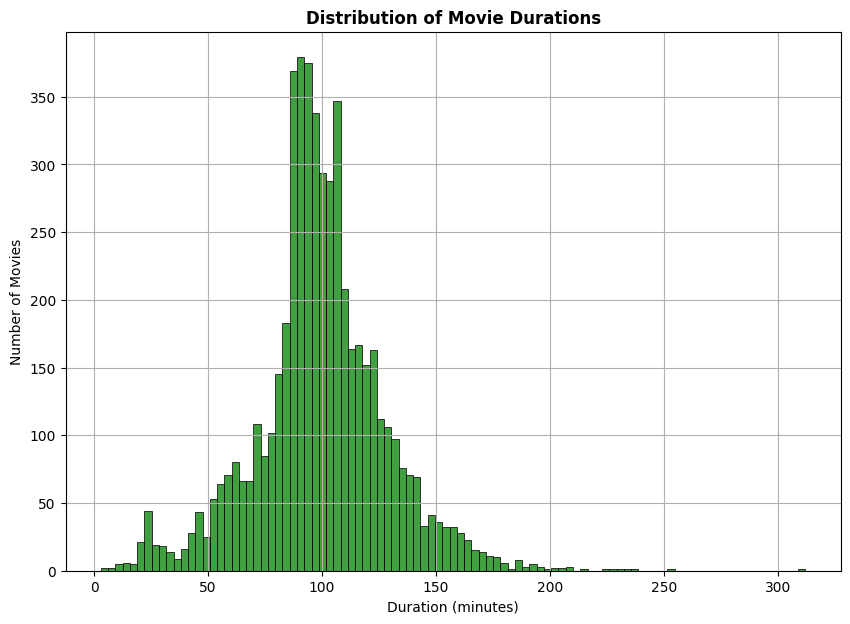

In [34]:
df_movies['duration_clean'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(10,7))
plots = sns.histplot(df_movies['duration_clean'], kde=False, color='green')
plt.title("Distribution of Movie Durations", fontweight='bold')
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
> I choose this to know the duration of the the movies

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> The distribution seems normal, most of the movies are under 80 to 130 mins, some are over 250 they might be outliers or real values i will look at them later.

#### Chart - 9

C:\Users\junai\AppData\Local\Temp\ipykernel_9712\1666562404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows['duration_clean'] = df_tvshows['duration'].str.extract(r'(\d+)').astype(float)
C:\Users\junai\AppData\Local\Temp\ipykernel_9712\1666562404.py:14: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from current font.
  plt.tight_layout()
C:\Users\junai\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


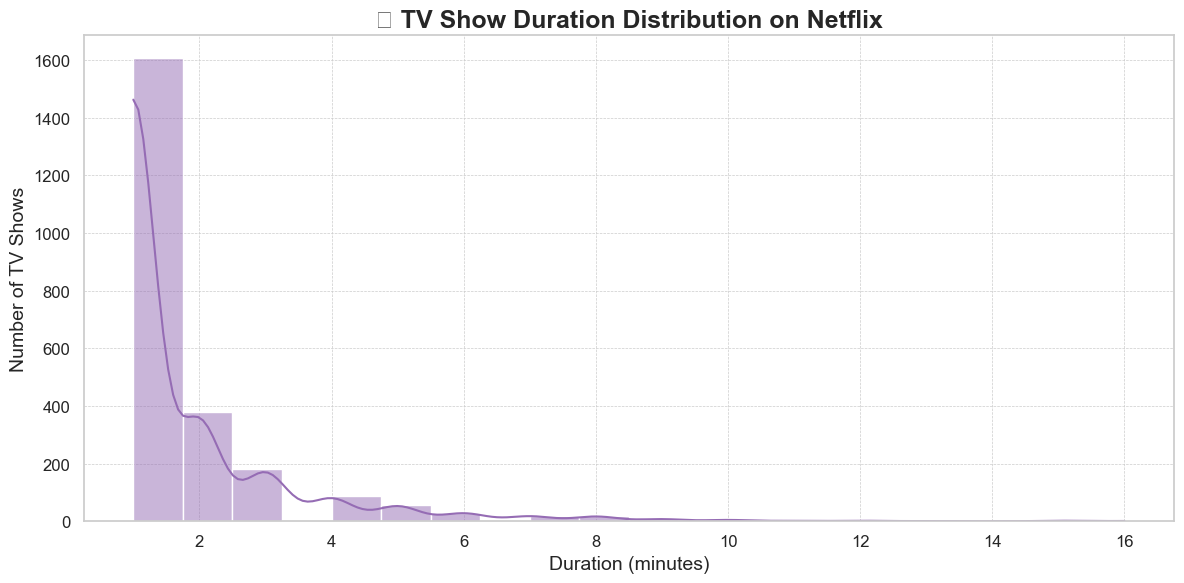

In [35]:
df_tvshows['duration_clean'] = df_tvshows['duration'].str.extract(r'(\d+)').astype(float)
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
palette = sns.color_palette("muted")

sns.histplot(data=df_tvshows, x='duration_clean', bins=20, kde=True, color=palette[4])
plt.title('🕒 TV Show Duration Distribution on Netflix', fontsize=18, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Number of TV Shows', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
> To know the distribution of the duration of the tv shows

##### 2. What is/are the insight(s) found from the chart?

Answer Here
> The chart shows that most of the tv shows duration is in between 80 to 120 mins

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
> (NULL) Hypothesis : The avg duration of tv shows released in 2020 on netflix is not differ from the average duration of tv shows released in 2021.

> (ALT) Hypothesis : The avg duration of tv shows released in 2020 on netflix is differ from the average duration of tv shows released in 2021.

#### 2. Perform an appropriate statistical test.

In [36]:
df['duration_clean'] = df['duration'].str.extract(r'(\d+)').astype(int)
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]
t_stat, p_val = ttest_ind(tv_2020['duration_clean'], tv_2021['duration_clean'], equal_var=False)
print(f"t-value: {t_stat:.3f}")
print(f"p-value: {p_val:.4g}")
if p_val < 0.05:
    print("✅ Reject null hypothesis: durations are significantly different.")
else:
    print("❌ Fail to reject null: no significant difference.")

t-value: -0.512
p-value: 0.6141
❌ Fail to reject null: no significant difference.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
> I used the 2 sample t-test 

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
> (Null) Hypothesis : There is no significant difference between the proportion of U.S.-produced TV shows and U.S.-produced movies added to Netflix.

> (Alt) Hypothesis : There is a significant difference between the proportion of U.S.-produced TV shows and U.S.-produced movies added to Netflix.

#### 2. Perform an appropriate statistical test.

In [37]:
tv_us_count = np.sum(df_tvshows['country'].str.contains('United States', na=False))
movie_us_count = np.sum(df_movies['country'].str.contains('United States', na=False))

tv_total = len(df_tvshows)
movie_total = len(df_movies)
count = [tv_us_count, movie_us_count]
nobs = [tv_total, movie_total]
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative='two-sided')
print(f"TV Shows from US: {tv_us_count}/{tv_total}")
print(f"Movies from US: {movie_us_count}/{movie_total}")
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.4g}")
alpha = 0.05
if p_value < alpha:
    print("✅ Significant: Reject the null hypothesis.")
else:
    print("❌ Not significant: Fail to reject the null hypothesis.")

TV Shows from US: 1136/2398
Movies from US: 2657/5372
Z-Statistic: -1.700
P-Value: 0.08907
❌ Not significant: Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
> I used 2 sample propotion test

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
df.isnull().sum()

type              0
title             0
director          0
cast              0
country           0
release_year      0
rating            0
duration          0
description       0
day_added         0
month_added       0
year_added        0
duration_clean    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
> NO missing values.

### 2. Handling Outliers

continuous_value_feature = ["release_year", "duration", "day_added", "month_added", "year_added"]

plt.figure(figsize=(16, 5))
for n, column in enumerate(continuous_value_feature):
    plt.subplot(1, 5, n + 1)
    sns.boxplot(df[column])
    plt.title(f'{column.title()}', weight='bold')
plt.tight_layout()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.
> The Duration column seems like having some some outliers but i am not sure about that so i will leave it as it is and move ahead.

### 3. Categorical Encoding

In [39]:
df["content_detail"] = (
    df["cast"] + " "
    + df["director"] + " "
    + df["type"] + " "
    + df["rating"] + " "
    + df["country"] + " "
    + df["description"]
)
df.head(5)

,type,title,director,cast,country,release_year,rating,duration,description,day_added,month_added,year_added,duration_clean,content_detail
0,TV Show,3%,UNK,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,In a future where the elite inhabit an island ...,14,8,2020,4,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,After a devastating earthquake hits Mexico Cit...,23,12,2016,93,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"When an army recruit is found dead, his fellow...",20,12,2018,78,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,80,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,A brilliant group of students become card-coun...,1,1,2020,123,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


In [40]:
df["content_detail"][1]

'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Jorge Michel Grau Movie Adult Content Mexico After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 2. Lower Casing

In [41]:
df["content_detail"] = df["content_detail"].str.lower()
df["content_detail"][1]

'demián bichir, héctor bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beato jorge michel grau movie adult content mexico after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

#### 3. Removing Punctuations

In [42]:
def remove_punctuations(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['content_detail'] = df['content_detail'].apply(remove_punctuations)
df.iloc[281]['content_detail']


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
def remove_url_and_numbers(text):
    url_number_pattern = re.compile(r'https://\S+|www\.\S+')
    text = re.sub(url_number_pattern, '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)

    return text

df['content_detail'] = df['content_detail'].apply(remove_url_and_numbers)
df.iloc[281]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [44]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def remove_stopwords_and_whitespaces(text):
    text = [word for word in text.split() if not word in stopwords.words('english')]
    text = " ".join(text)
    text = re.sub(r'\s+', ' ', text)
    return text


df['content_detail'] = df['content_detail'].apply(remove_stopwords_and_whitespaces)
df.iloc[281]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### 7. Tokenization

In [46]:
nltk.download('punkt')
df['content_detail'] = df['content_detail'].apply(nltk.word_tokenize)
df.iloc[28]['content_detail']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['helen',
 'mirren',
 'gengher',
 'gatti',
 'sabina',
 'fedeli',
 'anna',
 'migotto',
 'movie',
 'teen',
 'content',
 'italy',
 'diary',
 'anne',
 'franks',
 'story',
 'retold',
 'alongside',
 'five',
 'holocaust',
 'survivors',
 'poignant',
 'documentary',
 'oscar',
 'winner',
 'helen',
 'mirren']

#### 8. Text Normalization

In [47]:
wordnet = WordNetLemmatizer()
def lemmatizing_sentence(text):
    text = [wordnet.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [48]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
df['content_detail'] = df['content_detail'].apply(lemmatizing_sentence)
df.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### 9. Part of speech tagging

In [49]:
nlp = spacy.load("en_core_web_sm")
df['pos_tags'] = df['content_detail'].apply(lambda text: [(token.text, token.pos_) for token in nlp(str(text))])
df.head(5)

,type,title,director,cast,country,release_year,rating,duration,description,day_added,month_added,year_added,duration_clean,content_detail,pos_tags
0,TV Show,3%,UNK,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,In a future where the elite inhabit an island ...,14,8,2020,4,jo miguel bianca comparato michel gomes rodolf...,"[(jo, PROPN), (miguel, PROPN), (bianca, PROPN)..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,After a devastating earthquake hits Mexico Cit...,23,12,2016,93,demi n bichir h ctor bonilla oscar serrano aza...,"[(demi, PROPN), (n, PROPN), (bichir, PROPN), (..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"When an army recruit is found dead, his fellow...",20,12,2018,78,tedd chan stella chung henley hii lawrence koh...,"[(tedd, PROPN), (chan, PROPN), (stella, PROPN)..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,80,elijah wood john c reilly jennifer connelly ch...,"[(elijah, PROPN), (wood, PROPN), (john, PROPN)..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,A brilliant group of students become card-coun...,1,1,2020,123,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, PROPN), (sturgess, PROPN), (kevin, PROP..."


#### 10. Text Vectorization

In [84]:
tfidf = TfidfVectorizer(max_features=7000, stop_words='english', ngram_range=(1, 2), min_df=3)
tfidf_matrix = tfidf.fit_transform(df['content_detail'])
cosine_sim = cosine_similarity(tfidf_matrix)

In [51]:
x = tfidf.fit_transform(df["content_detail"].fillna(""))
print(x.shape)

(7770, 7000)


##### Which text vectorization technique have you used and why?

Answer Here.
> I used sklearn TfidfVectorizer 

### 7. Dimesionality Reduction

In [52]:
x_dense = x.toarray()
pca = PCA(n_components=1000, random_state=42)
pca.fit(x_dense)

explained = pca.explained_variance_ratio_
print(f"Total explained variance: {explained.sum():.4f}")

Total explained variance: 0.5583


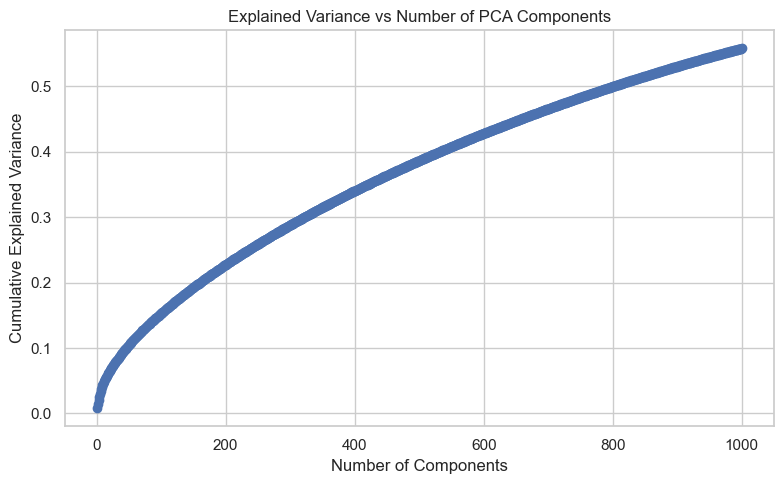

In [53]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('Explained Variance vs Number of PCA Components')
ax.grid(True)
plt.tight_layout()
plt.show()


In [54]:
x_dense = x.toarray()

pca_tuned = PCA(n_components=0.95, random_state=42)
x_transformed = pca_tuned.fit_transform(x_dense)

print("Transformed shape:", x_transformed.shape)

Transformed shape: (7770, 3752)


## ***7. ML Model Implementation***

### ML Model - 1

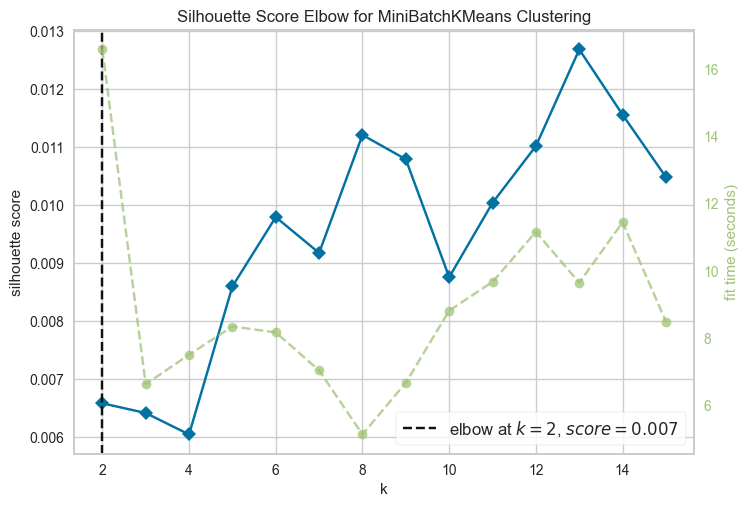

<Axes: title={'center': 'Silhouette Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize

x_norm = normalize(x_transformed)
model = MiniBatchKMeans(
    random_state=42,
    n_init=10,             
    max_iter=300,          
    batch_size=1024       
)

visualizer = KElbowVisualizer(
    model,
    k=(2, 16),
    metric='silhouette',   
    locate_elbow=True,
    timings=True
)

visualizer.fit(x_norm)
visualizer.show()


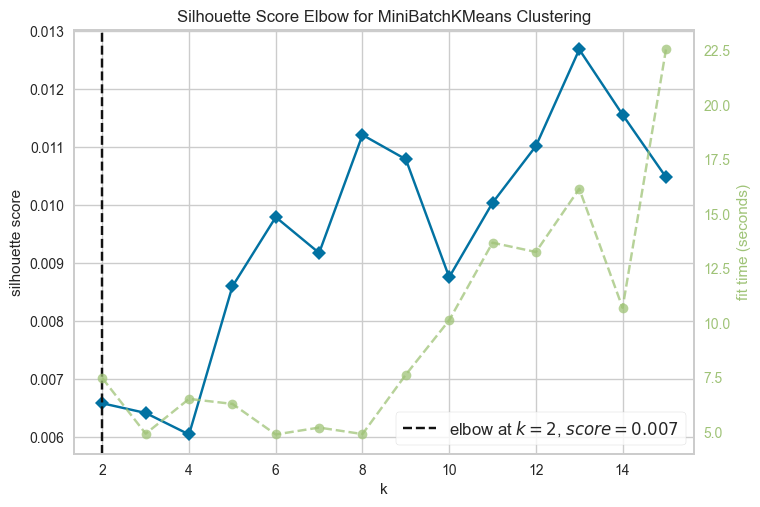

<Axes: title={'center': 'Silhouette Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [56]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize

x_norm = normalize(x_transformed)

model = MiniBatchKMeans(
    random_state=42,
    n_init=10,          
    max_iter=300,
    batch_size=1024
)

visualizer = KElbowVisualizer(
    model,
    k=(2, 16),
    metric='silhouette',
    timings=True,
    locate_elbow=True
)

visualizer.fit(x_norm)
visualizer.show()


In [57]:
k_range = range(2, 7)
for k in k_range:
    kmodel = KMeans(n_clusters=k, random_state=42)
    klabels = kmodel.fit_predict(x_transformed)
    score = silhouette_score(x_transformed, klabels)
    print(f"k={k}, Silhouette score={score:.6f}")

k=2, Silhouette score=0.004085
k=3, Silhouette score=0.007107
k=4, Silhouette score=0.007920
k=5, Silhouette score=0.007132
k=6, Silhouette score=0.009345


> The scores are not good, i have to go with other models.

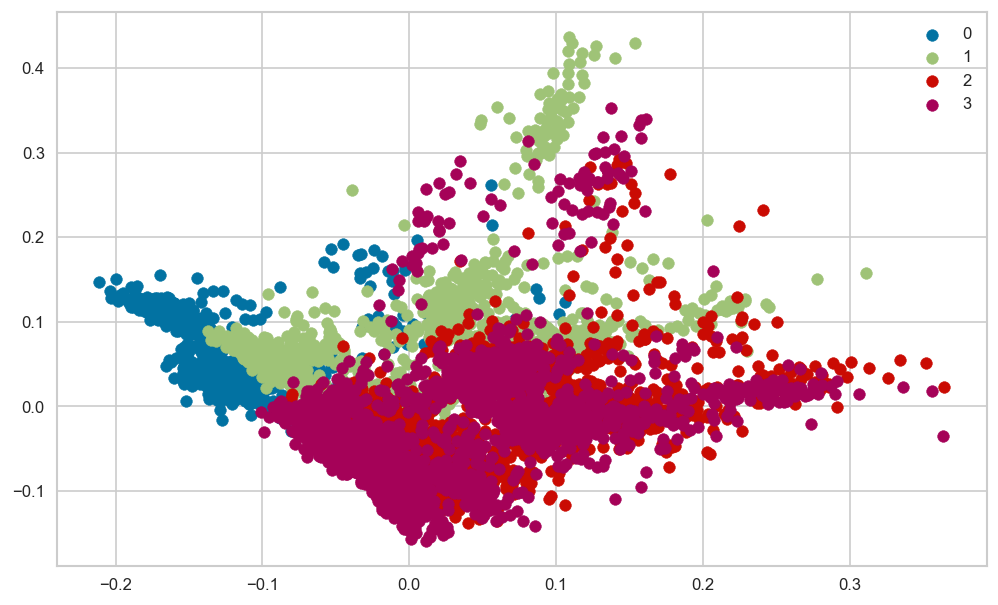

In [58]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
unique_labels = np.unique(label)
for i in unique_labels:
    plt.scatter(x_transformed[label == i, 0], x_transformed[label == i, 1], label = i)
plt.legend()
plt.show()

> The cluster's are badly overlapping.

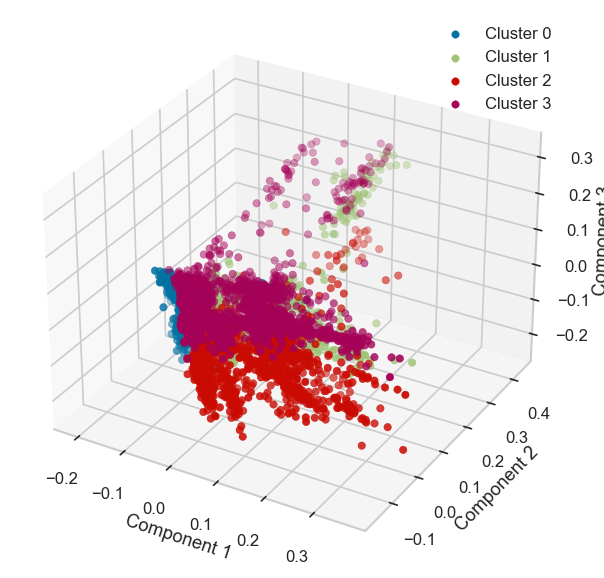

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
label = kmeans.fit_predict(x_transformed)
unique_labels = np.unique(label)

fig = plt.figure(figsize=(10, 6), dpi=120)
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
    ax.scatter(
        x_transformed[label == i, 0],
        x_transformed[label == i, 1],
        x_transformed[label == i, 2],
        label=f'Cluster {i}'
    )

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

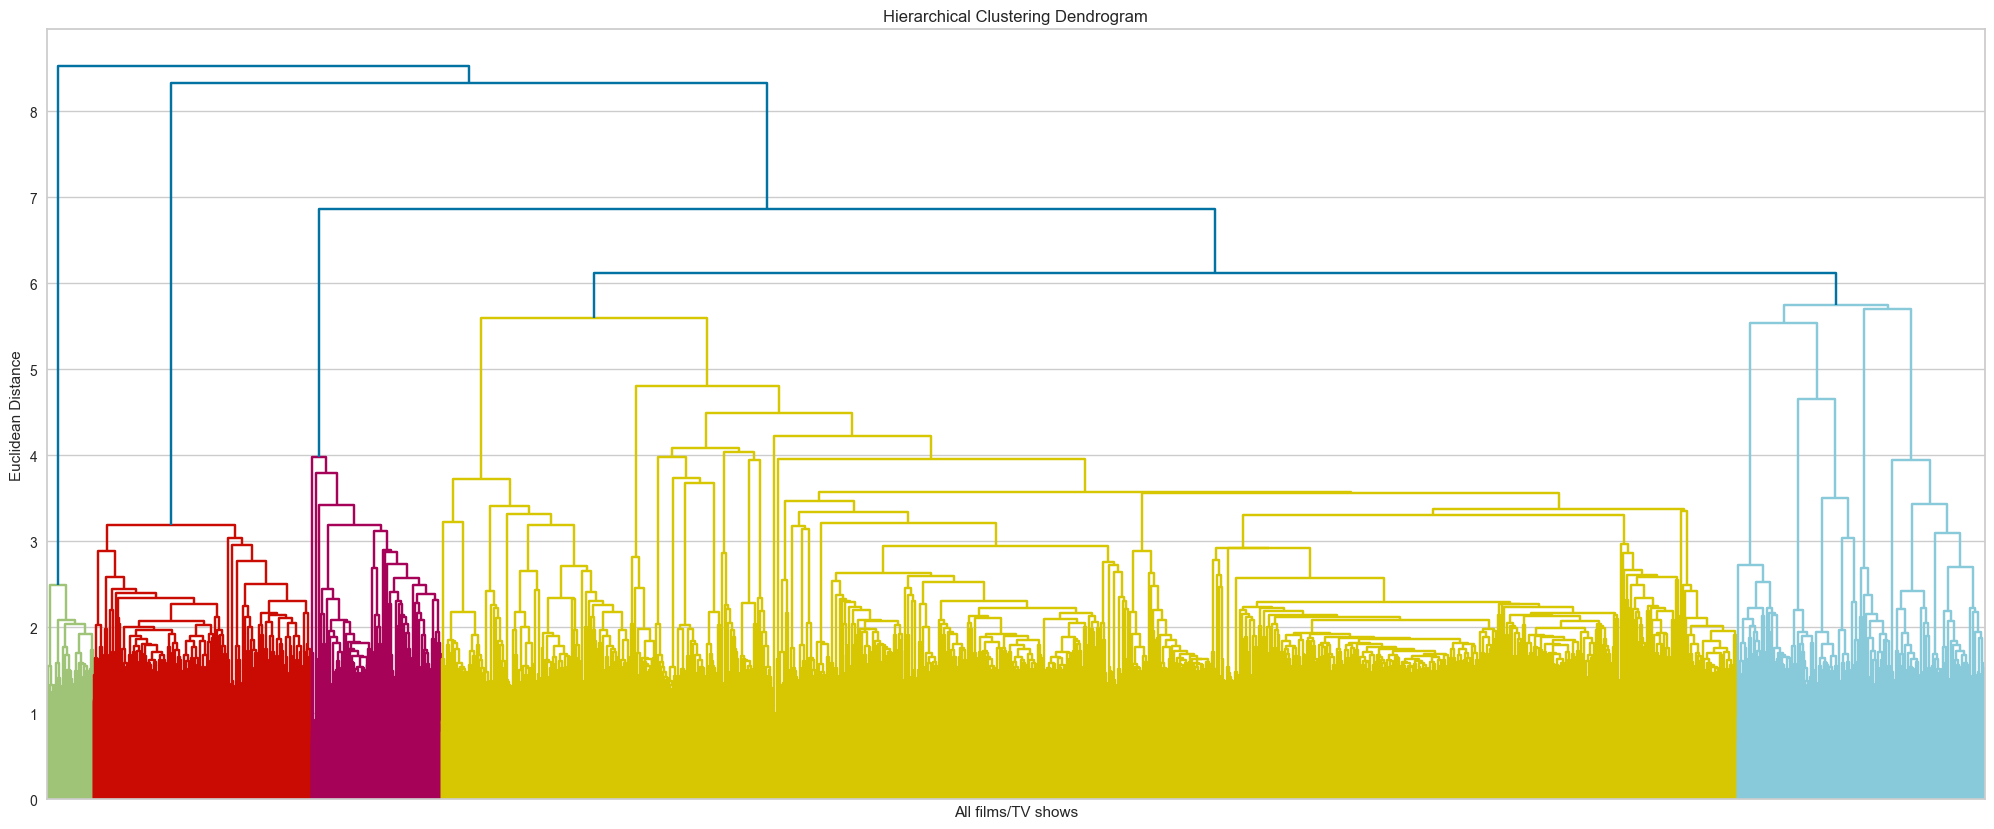

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram

distances_linkage = linkage(x_transformed, method='ward', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels=True)
plt.show()

In [61]:
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003733
k=3, Silhouette score=0.004963
k=4, Silhouette score=0.004914
k=5, Silhouette score=0.005891
k=6, Silhouette score=0.006664
k=7, Silhouette score=0.007149
k=8, Silhouette score=0.006002
k=9, Silhouette score=0.006845


> Still not getting good results.

### ML Model - 3

In [62]:
x_norm = normalize(x_transformed)
umap_model = UMAP(n_neighbors=15, n_components=10, random_state=42)
x_umap = umap_model.fit_transform(x_norm)

print("UMAP shape:", x_umap.shape)
hdbscan_model = HDBSCAN(min_cluster_size=10)
labels = hdbscan_model.fit_predict(x_umap)
if len(set(labels)) > 1 and -1 in labels:
    mask = labels != -1
    score = silhouette_score(x_umap[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.4f}")
elif len(set(labels)) > 1:
    score = silhouette_score(x_umap, labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Only one cluster found.")

c:\Users\junai\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP shape: (7770, 10)


c:\Users\junai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\junai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score (excluding noise): 0.6513


> Previous clustering models like KMeans and Agglomerative performed poorly with very low silhouette scores. To improve, I used UMAP for dimensionality reduction and HDBSCAN for density-based clustering, which handled noise better and gave a strong silhouette score, confirming improved clustering.

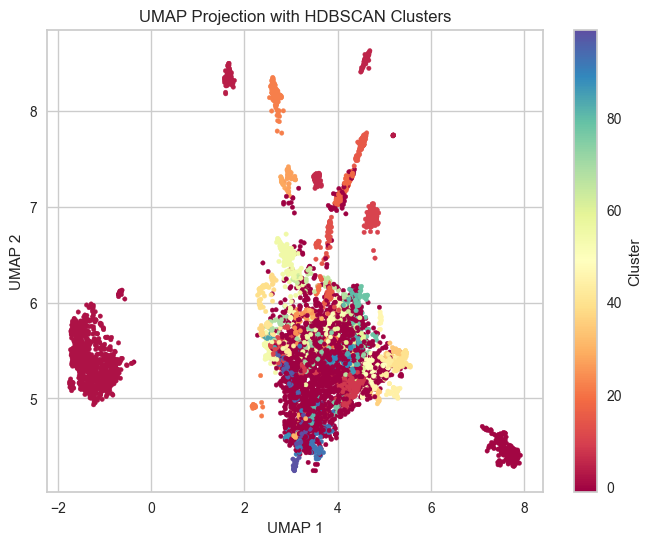

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=labels, cmap='Spectral', s=10)
plt.title("UMAP Projection with HDBSCAN Clusters")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label='Cluster')
plt.show()


In [64]:
df["hdbscan_cluster"] = labels

In [65]:
from wordcloud import WordCloud, STOPWORDS

def cluster_wordcloud(cluster_number, column_name, cluster_col='hdbscan_cluster', data=df):
    df_filtered = data[[cluster_col, column_name]].dropna()
    df_filtered = df_filtered[df_filtered[cluster_col] == cluster_number]

    text = " ".join(str(word) for word in df_filtered[column_name])

    wordcloud = WordCloud(
        stopwords=set(STOPWORDS), 
        background_color="black",
        width=800, 
        height=400,
        colormap='Set2'
    ).generate(text)

    return wordcloud


In [66]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'description', 'day_added', 'month_added',
       'year_added', 'duration_clean', 'content_detail', 'pos_tags',
       'hdbscan_cluster'],
      dtype='object')

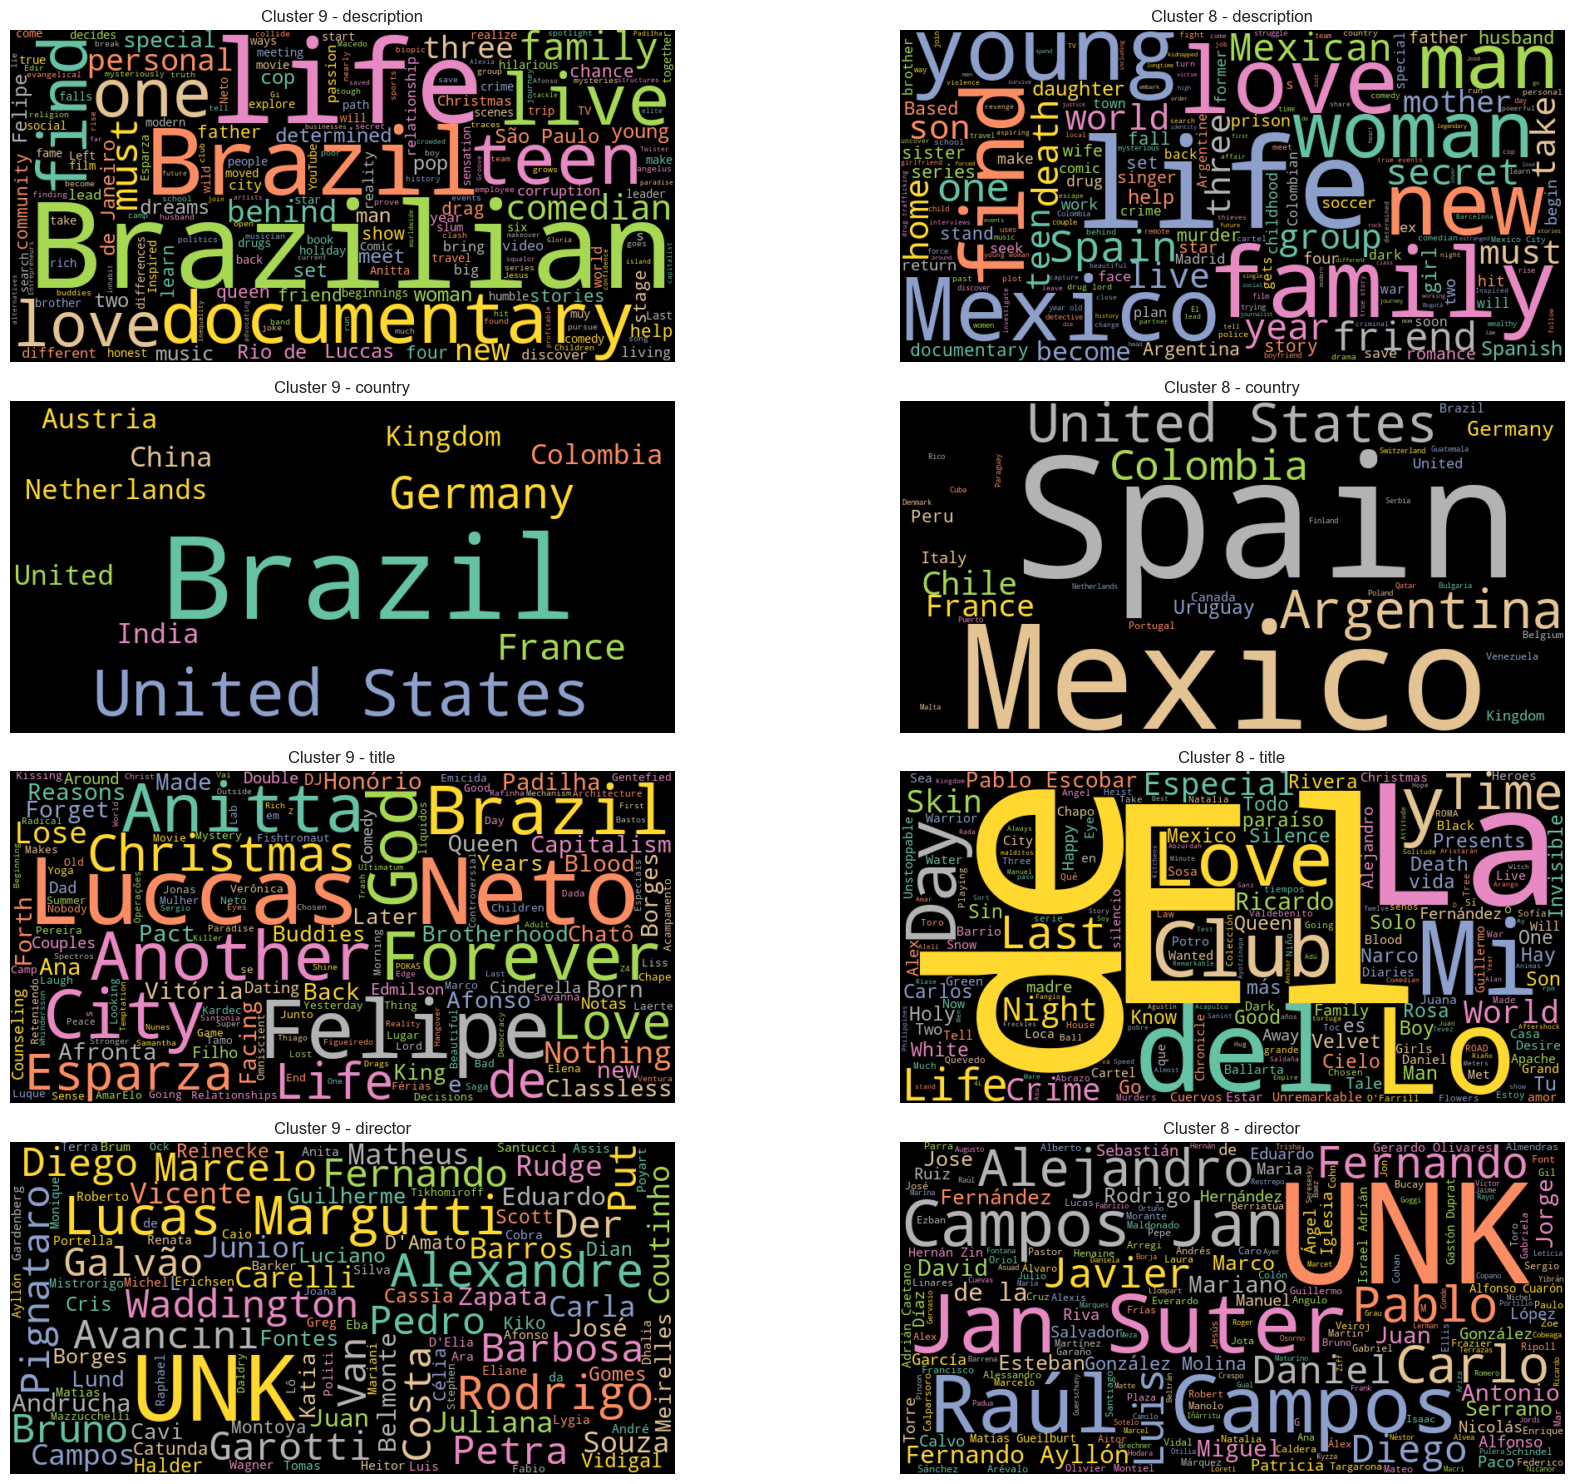

In [67]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
text_columns = ['description', 'country', 'title', 'director']
cluster_labels = [c for c in df['hdbscan_cluster'].unique() if c != -1]

for i, cluster in enumerate(cluster_labels[:2]):
    for j, col in enumerate(text_columns):
        wc = cluster_wordcloud(cluster, col, cluster_col='hdbscan_cluster', data=df)
        axs[j][i].imshow(wc, interpolation='bilinear')
        axs[j][i].set_title(f'Cluster {cluster} - {col}', fontsize=12)
        axs[j][i].axis('off')

plt.tight_layout()
plt.show()

In [85]:
def recommend_content(title, cosine_sim=cosine_sim, data=df, same_cluster_only=True):
    title = title.strip().lower()
    titles = data['title'].str.lower().tolist()
    
    if title not in titles:
        print(f"❌ Title '{title}' not found in dataset.")
        return pd.DataFrame(columns=["Recommendation", "Similarity_score(0-1)"])
    
    idx = titles.index(title)
    sim_scores = list(enumerate(cosine_sim[idx]))
    if same_cluster_only and 'hdbscan_cluster' in data.columns:
        target_cluster = data.iloc[idx]['hdbscan_cluster']
        sim_scores = [s for s in sim_scores if data.iloc[s[0]]['hdbscan_cluster'] == target_cluster]

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [s for s in sim_scores if s[0] != idx][:10]

    rec_indices = [s[0] for s in sim_scores]
    rec_titles = data.iloc[rec_indices]['title'].values
    rec_scores = [round(s[1], 4) for s in sim_scores]

    return pd.DataFrame({
        'Recommendation': rec_titles,
        'Similarity_score(0-1)': rec_scores
    })


In [86]:
recommend_content("Narcos")

,Recommendation,Similarity_score(0-1)
0,Wild District,0.3012
1,Sin Senos sí Hay Paraíso,0.2535
2,Surviving Escobar - Alias JJ,0.2471
3,La Viuda Negra,0.2460
4,The Great Heist,0.2439
5,El Dragón: Return of a Warrior,0.2384
6,Luis Miguel - The Series,0.2353
7,Dueños del paraíso,0.2320
8,La Reina del Sur,0.2307
9,Narcos: Mexico,0.2203


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [87]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

with open("cosine_similarity.pkl", "wb") as f:
    pickle.dump(cosine_sim, f)